# implementation of Principal component analysis unsupervised learning method


####  Here we begin looking at several unsupervised estimators, which can highlight interesting aspects of the data without reference to any known labels
#### The most broadly used of unsupervised algorithms, principal component analysis (PCA). PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more.

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA  

## Introducing Principal Component Analysis

### Its behavior is easiest to visualize by looking at a two-dimensional dataset. Consider the following 200 points:

(-2.7391278364515688,
 2.5801310701596343,
 -0.9477947579593762,
 1.019590430670684)

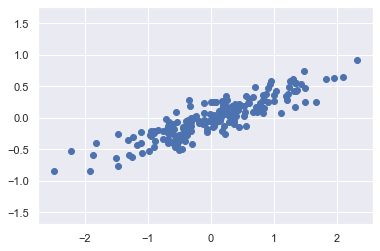

In [2]:
rng=np.random.RandomState(1)
#take dot product sof two arrays 
x=np.dot(rng.rand(2,2),rng.randn(2,200)).T
plt.scatter(x[:,0],x[:,1])
plt.axis('equal')

#### in the about the value of y can be founfd by the corrosponding value of x like in Linear Regression. But the unsupervised learning problem attempts to learn about the relationship between the x and y values rather than  finding values.

#### now In principal component analysis, this relationship is quantified by finding a list of the principal axes in the data, and using those axes to describe the dataset. Using Scikit-Learn's PCA estimator, we can compute this as follows:

In [3]:
pca =PCA(n_components=1)
pca.fit(x)
x_pca=pca.transform(x)
print("original shape:",x.shape)
print("original shape:",x_pca.shape)

original shape: (200, 2)
original shape: (200, 1)


### PCA for visualization

In [4]:
from sklearn.datasets import  load_digits
digits = load_digits()
digits.data.shape


(1797, 64)

#### data consists of 8×8 pixel images, meaning that they are 64-dimensional
##### we can use PCA to project them to a more manageable number of dimensions, say two:

In [5]:
pca =PCA(2)#from 64 to 2d
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


#### Choosing the number of components
A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:

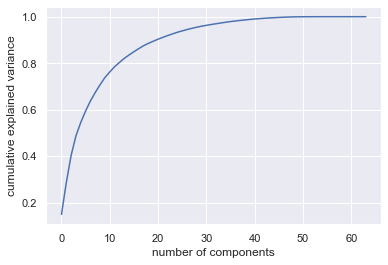

In [6]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

#### Pca as noise filtering

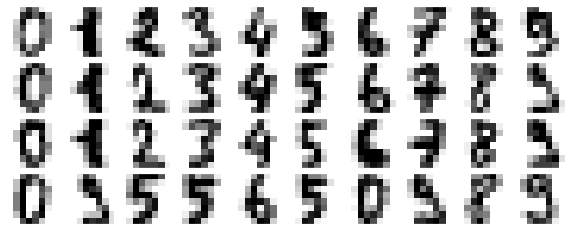

In [7]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

#### Now lets add some random noise to create a noisy dataset, and re-plot it:

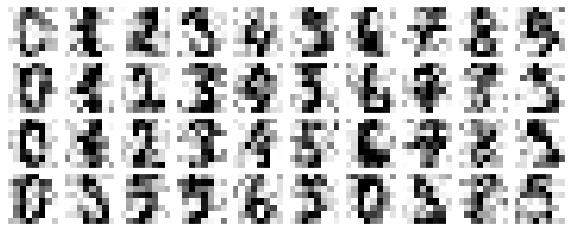

In [8]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)


Let's train a PCA on the noisy data, requesting that the projection preserve 50% of the variance:

In [9]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

Here 50% of the variance amounts to 12 principal components. Now we compute these components, and then use the inverse of the transform to reconstruct the filtered digits:

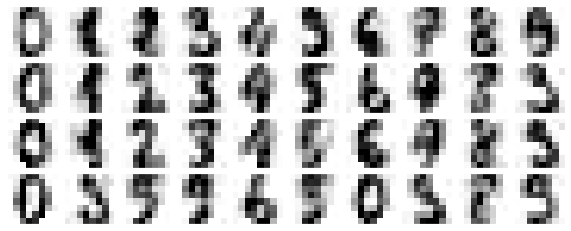

In [10]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

## Eighen Faces

In [11]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)


['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


. Because this is a large dataset, we will use RandomizedPCA—it contains a randomized method to approximate the first $N$ principal components much more quickly than the standard PCA estimator, and thus is very useful for high-dimensional data (here, a dimensionality of nearly 3,000). We will take a look at the first 150 components:

In [14]:
from sklearn.decomposition import RandomizedPCA
pca1 = RandomizedPCA(150)
pca1.fit(faces.data)

ImportError: cannot import name 'RandomizedPCA' from 'sklearn.decomposition' (E:\Anaconda\lib\site-packages\sklearn\decomposition\__init__.py)

In [ ]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca1.components_[i].reshape(62, 47), cmap='bone')


In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');